# Teil 2

## 1. Corona Daten

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]
df = pd.read_csv("Daten_Corona_clean.csv", sep=";", parse_dates=True, dayfirst=True, index_col=0)

In [45]:
df

bestätigte Köllner Fälle  Patienten in stationärer Behandlung  \
Datum                                                                       
2020-03-01                         4                                    1   
2020-03-02                         5                                    0   
2020-03-03                         6                                    0   
2020-03-04                        12                                    0   
2020-03-05                        15                                    0   
...                              ...                                  ...   
2020-09-16                      4206                                   36   
2020-09-17                      4260                                   35   
2020-09-18                      4300                                   48   
2020-09-19                      4373                                   57   
2020-09-20                      4472                                   57   

            Kölner als geheilt entlassen  Aktuell Infizierte in Köln  \
Datum                                                                  
2020-03-01                             0                           4   
2020-03-02                             0                           5   
2020-03-03                             0                           6   
2020-03-04                             0                          12   
2020-03-05                             0                          15   
...                                  ...                         ...   
2020-09-16                          3739                         352   
2020-09-17                          3773                         372   
2020-09-18                          3816                         369   
2020-09-19                          3864                         394   
2020-09-20                          3896                         460   

            Kölner Todesfälle  
Datum                          
2020-03-01                  0  
2020-03-02                  0  
2020-03-03                  0  
2020-03-04                  0  
2020-03-05                  0  
...                       ...  
2020-09-16                115  
2020-09-17                115  
2020-09-18                115  
2020-09-19                115  
2020-09-20                116  

[204 rows x 5 columns]

<AxesSubplot:xlabel='Datum'>

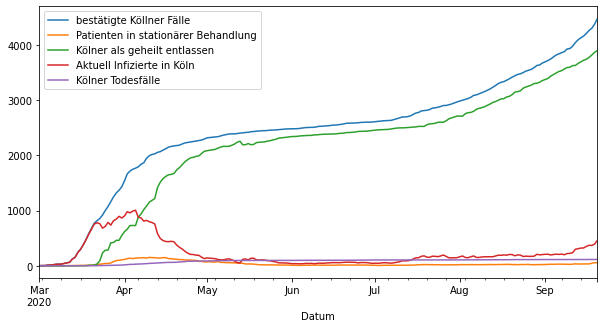

In [46]:
df.plot()

<AxesSubplot:xlabel='Datum'>

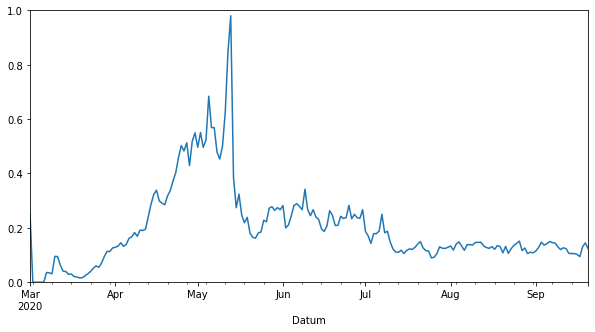

In [47]:
df["Hospitalisierungsrate"] = df["Patienten in stationärer Behandlung"]/df["Aktuell Infizierte in Köln"]
df["Hospitalisierungsrate"].plot(ylim=(0,1))


-> Etwa 15% - 20 % der bekannten Kölner COVID19 Fälle kommen ins Krankenhaus.
(Falsch, da "Patienten in stationärer Behandlung" auch "importierte" Fälle zeigt, also nicht-Kölner in Kölner Krankenhäuser)

13.05.2020: 51 aktive Covid Fälle, 50 Patienten im KH 
Peak im Mai vermutlich durch lange Liegezeiten der Fälle im KH und gleichzeitig geringe Anzahl erkannter COVID Fälle (Dunkelziffer?). Evtl. auch viele besonders schwere Fälle von außen in kölner KHs (z.B. Uniklinik)

<AxesSubplot:xlabel='Datum'>

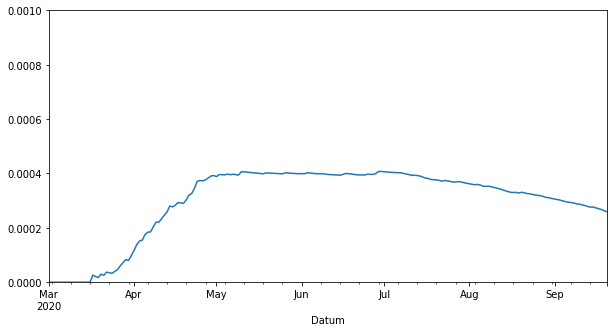

In [48]:
df["Todesrate[%]"] = df["Kölner Todesfälle"]/df["bestätigte Köllner Fälle"]/100
df["Todesrate[%]"].plot(ylim=(0,0.001))


In [49]:
df

bestätigte Köllner Fälle  Patienten in stationärer Behandlung  \
Datum                                                                       
2020-03-01                         4                                    1   
2020-03-02                         5                                    0   
2020-03-03                         6                                    0   
2020-03-04                        12                                    0   
2020-03-05                        15                                    0   
...                              ...                                  ...   
2020-09-16                      4206                                   36   
2020-09-17                      4260                                   35   
2020-09-18                      4300                                   48   
2020-09-19                      4373                                   57   
2020-09-20                      4472                                   57   

            Kölner als geheilt entlassen  Aktuell Infizierte in Köln  \
Datum                                                                  
2020-03-01                             0                           4   
2020-03-02                             0                           5   
2020-03-03                             0                           6   
2020-03-04                             0                          12   
2020-03-05                             0                          15   
...                                  ...                         ...   
2020-09-16                          3739                         352   
2020-09-17                          3773                         372   
2020-09-18                          3816                         369   
2020-09-19                          3864                         394   
2020-09-20                          3896                         460   

            Kölner Todesfälle  Hospitalisierungsrate  Todesrate[%]  
Datum                                                               
2020-03-01                  0               0.250000      0.000000  
2020-03-02                  0               0.000000      0.000000  
2020-03-03                  0               0.000000      0.000000  
2020-03-04                  0               0.000000      0.000000  
2020-03-05                  0               0.000000      0.000000  
...                       ...                    ...           ...  
2020-09-16                115               0.102273      0.000273  
2020-09-17                115               0.094086      0.000270  
2020-09-18                115               0.130081      0.000267  
2020-09-19                115               0.144670      0.000263  
2020-09-20                116               0.123913      0.000259  

[204 rows x 7 columns]

## 2. Skalenniveaus


a) 
- Dauer der Fahrt in Minuten: metrisch ratio
- Einsatzkilometer: metrisch ratio
- Patientenzustand von 0 bis VII: ordinal

unabhängig ob stetig oder diskret (analog oder digital abgelesen)

b) Unterschiedliche Skalierungsmöglichkeiten des Merkmals "Einsatzort"
- Entfernung von Wache in km: metrisch ratio
- Entfernung von Wache {sehr nah;nah;üblich;weit;sehr weit}: ordinal
- Innerhalb oder Außerhalb des Stadtgebietes: nominal